In [1]:
# Data Handling
import numpy as np
import pandas as pd
import pyodbc
from dotenv import dotenv_values

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing 
from imblearn.over_sampling import RandomOverSampler

# Machine Learning Modeling
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

# Miscellaneous
from termcolor import colored

# Model Saving
import pickle

# Other Packages
import warnings

warnings.filterwarnings("ignore")

In [2]:
Train_csv_original = pd.read_csv('Train.csv')
df = Train_csv_original

In [3]:
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [4]:
# The shape of the dataset
df.shape

(7000, 24)

In [5]:
# Column information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
# Investigate the column names of the dataset
df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [7]:
# Show the dataset summary statistics.
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


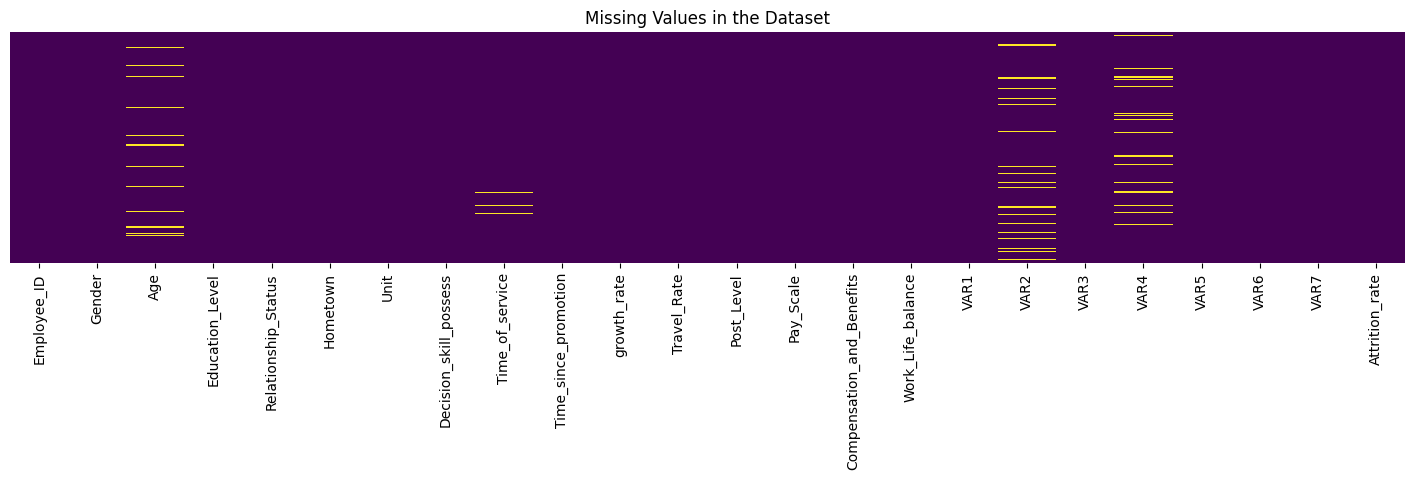

Missing Value Counts:


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Missing Value Counts,0,0,412,0,0,0,0,0,144,0,...,0,11,0,577,0,656,0,0,0,0


In [8]:
# Confirmation check for missing values in the dataset
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(18, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

# Display missing value counts as a DataFrame
print("Missing Value Counts:")
print('===' * 18)
missing_values_df = pd.DataFrame({'Missing Value Counts': missing_values})
missing_values_df_transposed = missing_values_df.transpose()
missing_values_df_transposed

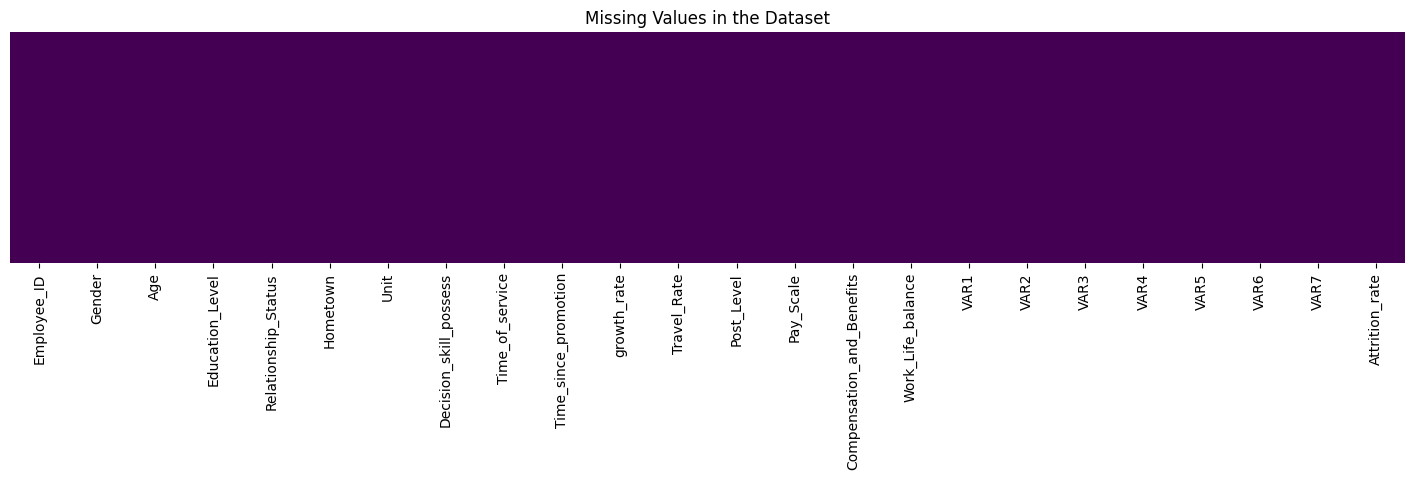

Missing Value Counts:


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Missing Value Counts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = df.dropna()
# Confirmation check for missing values in the dataset
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(18, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

# Display missing value counts as a DataFrame
print("Missing Value Counts:")
print('===' * 18)
missing_values_df = pd.DataFrame({'Missing Value Counts': missing_values})
missing_values_df_transposed = missing_values_df.transpose()
missing_values_df_transposed

In [10]:
# Check for duplicates in the dataset
df_duplicates = df[df.duplicated()]

# Display the duplicate rows in the dataset, if any
if not df_duplicates.empty:
    print("Duplicate Rows in Dataset:")
    display(df_duplicates)  # Display the duplicated dataframe
else:
    print("No Duplicate Rows in Dataset")

No Duplicate Rows in Dataset


In [11]:
# Get a list of all column names except "Attrition"
other_columns = [col for col in df.columns if col != 'Attrition_rate']

# Reorder the DataFrame columns with "Attrition" at the end
df = df[other_columns + ['Attrition_rate']]
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


In [12]:
# Calculate the Percentage of Attrition vs No-attrition Cases
df['Attrition_rate'] = df['Attrition_rate'].apply(lambda x: False if x < 0.3 else True)
attrition_percentage = df['Attrition_rate'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
attrition_percentage = attrition_percentage.round(2)

# Create a DataFrame
attrition_df = pd.DataFrame({'Attrition Type': attrition_percentage.index,
                         'Percentage': attrition_percentage.values})

# Display the DataFrame
attrition_df

,Attrition Type,Percentage
0,False,87.26
1,True,12.74


In [13]:
# Distribution counts of the target variable.
df['Attrition_rate'].value_counts()

Attrition_rate
False    4671
True      682
Name: count, dtype: int64

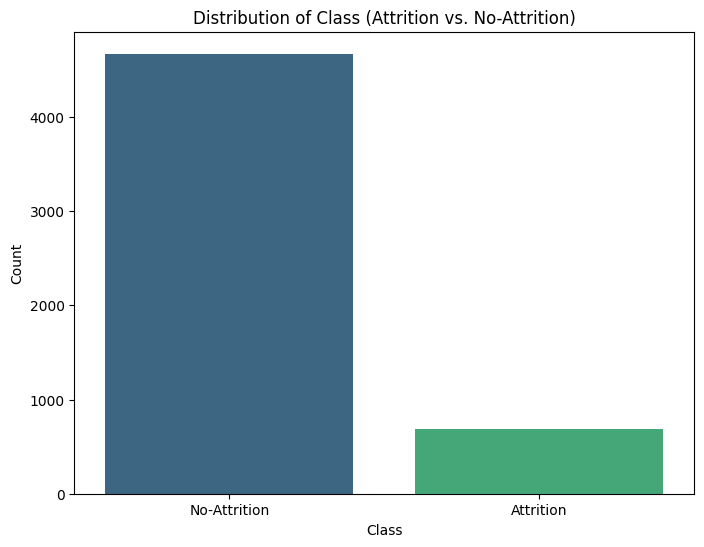

In [14]:
# Distribution counts of the target variable
class_counts = df['Attrition_rate'].value_counts()

# Create count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_rate', data=df, palette='viridis')
plt.title('Distribution of Class (Attrition vs. No-Attrition)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No-Attrition', 'Attrition'])
plt.show()

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the dataset
# Replace 'JobSatisfaction' and 'Attrition' with the actual column names from your dataset
observed_freq = pd.crosstab(df['Education_Level'], df['Attrition_rate'])

# Print the contingency table
print("Contingency Table:")
observed_freq

# Perform chi-square test
chi2, p_value, dof, expected_freq = chi2_contingency(observed_freq)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected_freq)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant association between job satisfaction and attrition.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between job satisfaction and attrition.")

Contingency Table:
Chi-Square Statistic: 4.8544120331476925
P-value: 0.30256454276196604
Degrees of Freedom: 4
Expected Frequencies:
 [[ 463.34784233   67.65215767]
 [ 465.96562675   68.03437325]
 [1943.26863441  283.73136559]
 [1347.28638147  196.71361853]
 [ 451.13151504   65.86848496]]
Fail to reject the null hypothesis.
There is no significant association between job satisfaction and attrition.


In [16]:
# Confirm column names
df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

def check_significance(features, df, target, threshold=0.05):
    """
    Función para comprobar la significancia entre las features y el objetivo usando la prueba Chi-cuadrado.
    
    Parameters:
    - features: lista de nombres de las columnas (features) que se analizarán.
    - df: DataFrame que contiene el dataset.
    - target: nombre de la columna objetivo.
    - threshold: valor p para considerar la significancia (por defecto 0.05).
    
    Returns:
    - DataFrame con la columna 'p_value' indicando la significancia de cada feature.
    """
    results = []
    
    for feature in features:
        # Crear la tabla de contingencia entre la feature y el objetivo
        observed_freq = pd.crosstab(df[feature], df[target])
        
        # Realizar la prueba de chi-cuadrado
        chi2, p_value, dof, expected_freq = chi2_contingency(observed_freq)
        
        # Verificar si el p_value es menor que el umbral (significativo)
        significance = "Significant" if p_value < threshold else "Not Significant"
        
        # Guardar el resultado
        results.append({
            'Feature': feature,
            'p_value': p_value,
            'Significance': significance
        })
    
    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame(results)
    return results_df

# Ejemplo de uso:
# df = tu DataFrame
# features = ['Education_Level', 'OtherFeature1', 'OtherFeature2']  # Lista de features
# target = 'Attrition_rate'  # Columna objetivo

# Llamar a la función
significance_table = check_significance(features=['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'], df=df, target='Attrition_rate')

# Mostrar la tabla de resultados
print(significance_table)

                      Feature   p_value     Significance
0                 Employee_ID  0.493574  Not Significant
1                      Gender  0.217672  Not Significant
2                         Age  0.555568  Not Significant
3             Education_Level  0.302565  Not Significant
4         Relationship_Status  0.062532  Not Significant
5                    Hometown  0.637000  Not Significant
6                        Unit  0.164610  Not Significant
7      Decision_skill_possess  0.278190  Not Significant
8             Time_of_service  0.743598  Not Significant
9        Time_since_promotion  0.808564  Not Significant
10                growth_rate  0.201039  Not Significant
11                Travel_Rate  0.182596  Not Significant
12                 Post_Level  0.809867  Not Significant
13                  Pay_Scale  0.981197  Not Significant
14  Compensation_and_Benefits  0.003777      Significant
15          Work_Life_balance  0.045521      Significant
16                       VAR1  

In [18]:
# Check unique values of the categorical columns in the dataset using a for loop 
categorical_columns = df.select_dtypes(include=['object','bool']).columns

for column in categorical_columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))
    print('==='*35)

Column: Employee_ID - Unique Values: ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Column: Gender - Unique Values: ['F' 'M']
Column: Relationship_Status - Unique Values: ['Married' 'Single']
Column: Hometown - Unique Values: ['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
Column: Unit - Unique Values: ['IT' 'Logistics' 'Quality' 'Purchasing' 'Operarions' 'Sales'
 'Human Resource Management' 'Accounting and Finance' 'R&D' 'Marketing'
 'Production' 'Security']
Column: Decision_skill_possess - Unique Values: ['Conceptual' 'Analytical' 'Directive' 'Behavioral']
Column: Compensation_and_Benefits - Unique Values: ['type2' 'type3' 'type4' 'type0' 'type1']
Column: Attrition_rate - Unique Values: [False  True]


In [19]:
# drop the unnecessary columns
# df.drop(['Employee_ID', 'Gender', 'Education_Level',
#        'Relationship_Status', 'Hometown', 'Decision_skill_possess',
#        'Time_of_service', 'Travel_Rate',
#        'Post_Level', 'Pay_Scale', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
#        'VAR7'],axis=1,inplace=True)


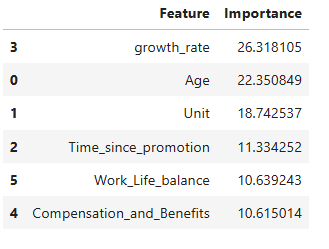
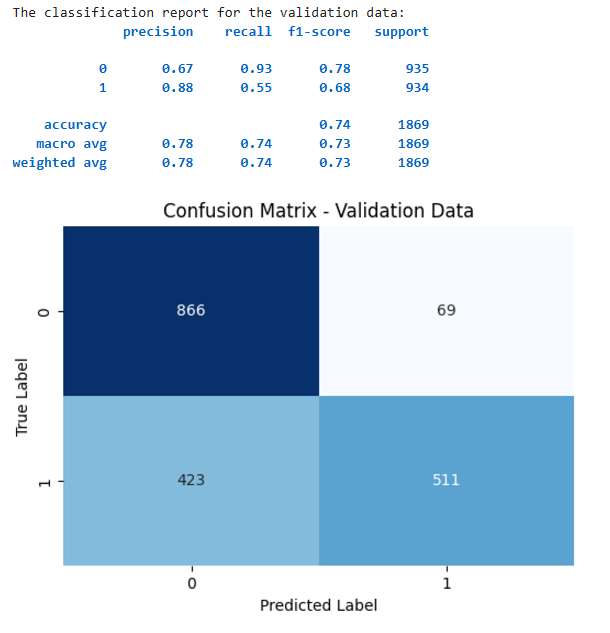

In [20]:
df.drop(['Employee_ID', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],axis=1,inplace=True)

In [21]:
# Check the remaining columns
df.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance',
       'Attrition_rate'],
      dtype='object')

In [22]:
# Column information the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5353 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     5353 non-null   object 
 1   Age                        5353 non-null   float64
 2   Education_Level            5353 non-null   int64  
 3   Relationship_Status        5353 non-null   object 
 4   Hometown                   5353 non-null   object 
 5   Unit                       5353 non-null   object 
 6   Decision_skill_possess     5353 non-null   object 
 7   Time_of_service            5353 non-null   float64
 8   Time_since_promotion       5353 non-null   int64  
 9   growth_rate                5353 non-null   int64  
 10  Travel_Rate                5353 non-null   int64  
 11  Post_Level                 5353 non-null   int64  
 12  Pay_Scale                  5353 non-null   float64
 13  Compensation_and_Benefits  5353 non-null   object 
 1

In [23]:
# Copy the DataFrame
train_data = df.copy()

# Save it as a CSV named train_data.csv
train_data.to_csv('train_data.csv', index=False)

## Extract the target column and drop it from the dataset

In [24]:
# Extract the target column
target_df = df['Attrition_rate']
target_df = pd.DataFrame(target_df)
target_df.head()

,Attrition_rate
0,False
1,False
2,False
4,False
5,True


In [25]:
# Drop it from the train dataset
df_total = df
df = df.drop('Attrition_rate', axis=1)
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0
5,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0


## Balancing the dataset

In [26]:
# Check the class distribution in the training set
print("Class distribution before balancing:")
print(target_df.value_counts())

Class distribution before balancing:
Attrition_rate
False             4671
True               682
Name: count, dtype: int64


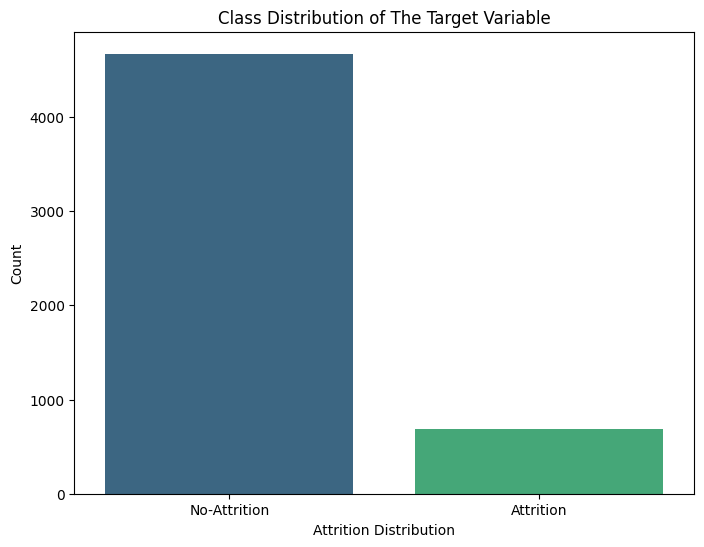

In [27]:
# Count the occurrences of each class in the dataset
class_counts = target_df['Attrition_rate'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Attrition Distribution')
plt.ylabel('Count')
plt.xticks([False, True], ['No-Attrition', 'Attrition'])
plt.title('Class Distribution of The Target Variable')
plt.show()

In [28]:
# Balance the training set using Random Oversampling
oversampler = RandomOverSampler(random_state=42)
df_balanced, target_df_balanced = oversampler.fit_resample(df, target_df)
# df_balanced =df
# target_df_balanced =target_df
# Check the class distribution after balancing
balanced_class_counts = target_df_balanced.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Attrition_rate
False             4671
True              4671
Name: count, dtype: int64


In [29]:
df_balanced.shape

(9342, 15)

In [30]:
target_df_balanced.shape

(9342, 1)

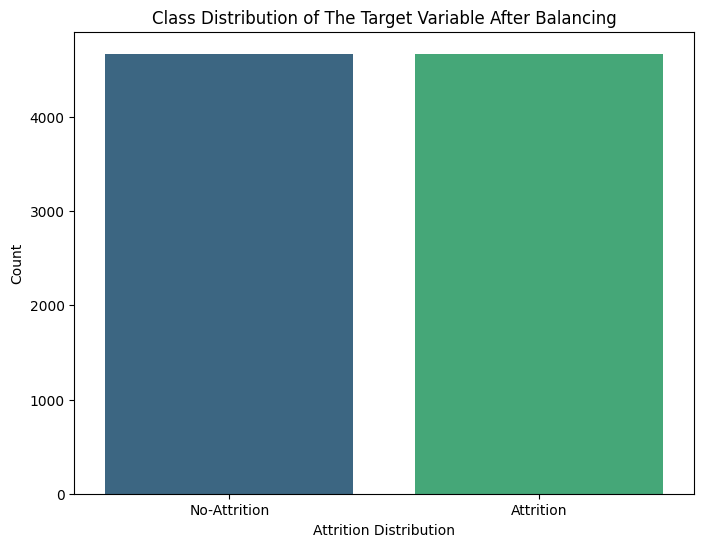

In [31]:
# Count the occurrences of each class in the balanced dataset
class_counts = target_df_balanced['Attrition_rate'].value_counts()

# Create a bar plot with the 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Attrition Distribution')
plt.ylabel('Count')
plt.xticks([False, True], ['No-Attrition', 'Attrition'])
plt.title('Class Distribution of The Target Variable After Balancing')
plt.show()

In [32]:
# Map the Attrition column to 0 for False and 1 for True
target_df_balanced['Attrition_rate'] = target_df_balanced['Attrition_rate'].map({False: 0, True: 1})
target_df_balanced.head()

,Attrition_rate
0,0
1,0
2,0
3,0
4,1


# Modelling

In [33]:
# Define the training features (X) and target variable (y)
X = df_balanced
y = target_df_balanced['Attrition_rate']

# Split the data into a training set and an evaluation set (i.e., 80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (7473, 15) (7473,)
Shape of the Evaluation Set (X_eval, y_eval): (1869, 15) (1869,)


In [34]:
y_train.head()

5276    1
9297    1
4503    0
2556    0
9077    1
Name: Attrition_rate, dtype: int64

In [35]:
X_eval.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance
6776,F,31.0,5,Married,Washington,Quality,Analytical,5.0,2,24,2,4,6.0,type3,3.0
3314,F,22.0,2,Single,Springfield,Logistics,Behavioral,3.0,2,72,1,5,5.0,type3,4.0
7866,M,27.0,3,Married,Washington,Purchasing,Conceptual,5.0,4,68,0,3,8.0,type3,4.0
1447,M,47.0,3,Married,Washington,IT,Conceptual,22.0,3,64,1,3,2.0,type2,4.0
6431,M,38.0,2,Single,Franklin,Human Resource Management,Conceptual,10.0,4,41,2,5,4.0,type2,3.0


In [36]:
y_eval.head()

6776    1
3314    0
7866    1
1447    0
6431    1
Name: Attrition_rate, dtype: int64

In [37]:
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (7473, 15) (7473,)
Shape of the Evaluation Set (X_eval, y_eval): (1869, 15) (1869,)


In [38]:
# We will convert categorical columns to string data type and capture the indices where string datatype is present. 
# These indices will be used for the CatBoost model.

# Selecting object data type columns (categorical columns) in the training dataset
cat_cols_index = np.where(df_balanced.dtypes == 'object')[0]
print("The indices of the categorical columns are:")
print(cat_cols_index)
print()


for i in range(len(X_train.columns)):
    if i in cat_cols_index:
        X_train[X_train.columns[i]] = X_train[X_train.columns[i]].astype(str)
        X_eval[X_train.columns[i]] = X_eval[X_train.columns[i]].astype(str)

# Initialize the CatBoostClassifier model
model = CatBoostClassifier(random_state=42, n_estimators=1000)

# Fit the CatBoost model on the training data with categorical features specified
catboost_model = model.fit(X_train, y_train, cat_features=cat_cols_index)

The indices of the categorical columns are:
[ 0  3  4  5  6 13]

Learning rate set to 0.024317
0:	learn: 0.6923354	total: 183ms	remaining: 3m 2s
1:	learn: 0.6916125	total: 208ms	remaining: 1m 44s
2:	learn: 0.6909646	total: 234ms	remaining: 1m 17s
3:	learn: 0.6901126	total: 256ms	remaining: 1m 3s
4:	learn: 0.6900486	total: 266ms	remaining: 52.8s
5:	learn: 0.6895546	total: 288ms	remaining: 47.7s
6:	learn: 0.6855844	total: 310ms	remaining: 44s
7:	learn: 0.6848065	total: 332ms	remaining: 41.1s
8:	learn: 0.6838508	total: 354ms	remaining: 39s
9:	learn: 0.6810741	total: 373ms	remaining: 36.9s
10:	learn: 0.6801443	total: 395ms	remaining: 35.5s
11:	learn: 0.6769342	total: 420ms	remaining: 34.6s
12:	learn: 0.6762753	total: 441ms	remaining: 33.5s
13:	learn: 0.6751756	total: 463ms	remaining: 32.6s
14:	learn: 0.6741205	total: 485ms	remaining: 31.8s
15:	learn: 0.6728097	total: 507ms	remaining: 31.2s
16:	learn: 0.6687951	total: 528ms	remaining: 30.5s
17:	learn: 0.6681116	total: 550ms	remaining: 30s
1

In [39]:
non_numeric_columns = df_balanced.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns

['Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [40]:
X_eval.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance
6776,F,31.0,5,Married,Washington,Quality,Analytical,5.0,2,24,2,4,6.0,type3,3.0
3314,F,22.0,2,Single,Springfield,Logistics,Behavioral,3.0,2,72,1,5,5.0,type3,4.0
7866,M,27.0,3,Married,Washington,Purchasing,Conceptual,5.0,4,68,0,3,8.0,type3,4.0
1447,M,47.0,3,Married,Washington,IT,Conceptual,22.0,3,64,1,3,2.0,type2,4.0
6431,M,38.0,2,Single,Franklin,Human Resource Management,Conceptual,10.0,4,41,2,5,4.0,type2,3.0


In [41]:
X_eval.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
dtype: object

In [42]:
# Use the trained CatBoost model to make predictions on the evaluation set
y_pred_eval = catboost_model.predict(X_eval)

# Calculate the accuracy on the evaluation set
accuracy = accuracy_score(y_pred_eval, y_eval)

# Print the accuracy with a colored text message
print(colored(f'The accuracy attained on the validation set is {accuracy:.2%}', 'green', attrs=['bold']))

The accuracy attained on the validation set is 88.07%


The classification report only on the validation data:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       935
           1       0.84      0.93      0.89       934

    accuracy                           0.88      1869
   macro avg       0.89      0.88      0.88      1869
weighted avg       0.89      0.88      0.88      1869



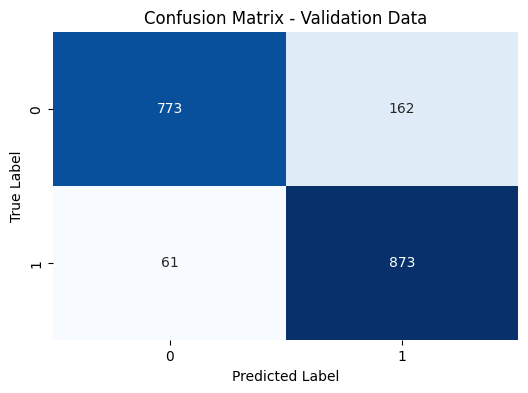

The classification report only on the train data:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3736
           1       0.94      0.97      0.96      3737

    accuracy                           0.96      7473
   macro avg       0.96      0.96      0.96      7473
weighted avg       0.96      0.96      0.96      7473



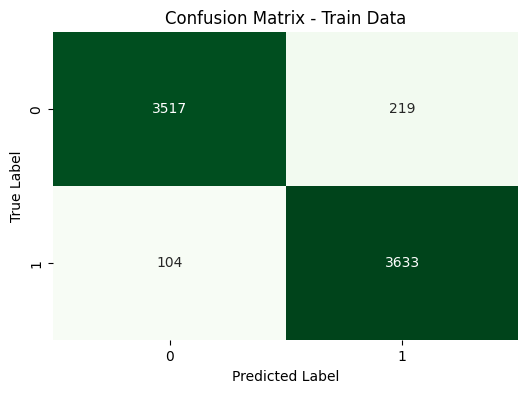

In [43]:
# Classification report and confusion matrix for the validation data
print('The classification report only on the validation data:')
print(colored(classification_report(y_eval, model.predict(X_eval)), 'blue', attrs=['bold']))

# Calculate the confusion matrix for validation data
cm_eval = confusion_matrix(y_eval, model.predict(X_eval))

# Plot confusion matrix for validation data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report and confusion matrix for the train data
print('The classification report only on the train data:')
print(colored(classification_report(y_train, model.predict(X_train)), 'green', attrs=['bold']))

# Calculate the confusion matrix for train data
cm_train = confusion_matrix(y_train, model.predict(X_train))

# Plot confusion matrix for train data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



The classification report for the validation data:
              precision    recall  f1-score   support

           0       0.87      0.93      0.89       935
           1       0.92      0.86      0.89       934

    accuracy                           0.89      1869
   macro avg       0.89      0.89      0.89      1869
weighted avg       0.89      0.89      0.89      1869



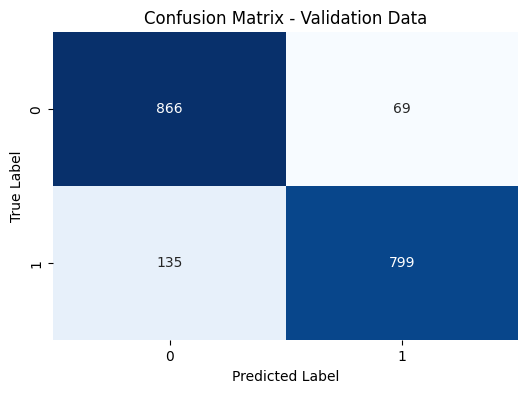



The classification report for the train data:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3736
           1       0.98      0.91      0.94      3737

    accuracy                           0.95      7473
   macro avg       0.95      0.95      0.94      7473
weighted avg       0.95      0.95      0.94      7473



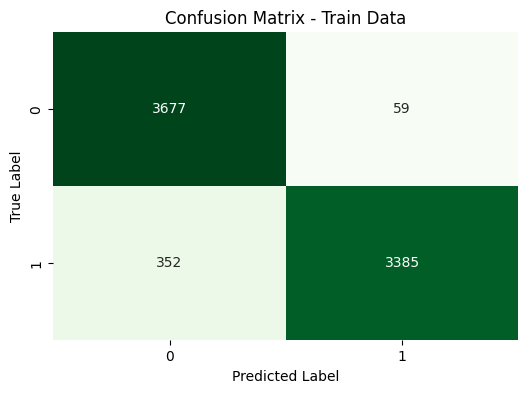

In [44]:
# Model Evaluation
thresh = 0.6 # Is better to put actions only in people really needs help, instead of wasting time on people looks okay
train_pred = np.where(model.predict_proba(X_train)[:, 1] > thresh, 1, 0)
test_pred = np.where(model.predict_proba(X_eval)[:, 1] > thresh, 1, 0)

# Classification report and confusion matrix for the validation data
print('The classification report for the validation data:')
print(colored(classification_report(y_eval, test_pred), 'blue', attrs=['bold']))

# Calculate the confusion matrix for validation data
cm_eval = confusion_matrix(y_eval, test_pred)

# Plot confusion matrix for validation data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('===' * 20)
print('\n')

# Classification report and confusion matrix for the train data
print('The classification report for the train data:')
print(colored(classification_report(y_train, train_pred), 'green', attrs=['bold']))

# Calculate the confusion matrix for train data
cm_train = confusion_matrix(y_train, train_pred)

# Plot confusion matrix for train data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
# Get feature importances from the trained CatBoost model
feature_importances = catboost_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance_df

,Feature,Importance
5,Unit,12.929000
9,growth_rate,12.208205
1,Age,9.347318
7,Time_of_service,8.493629
4,Hometown,8.145668
13,Compensation_and_Benefits,7.985276
12,Pay_Scale,7.248807
14,Work_Life_balance,5.873789
11,Post_Level,5.781122
6,Decision_skill_possess,5.022985


In [46]:
df_balanced.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0
3,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0
4,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0


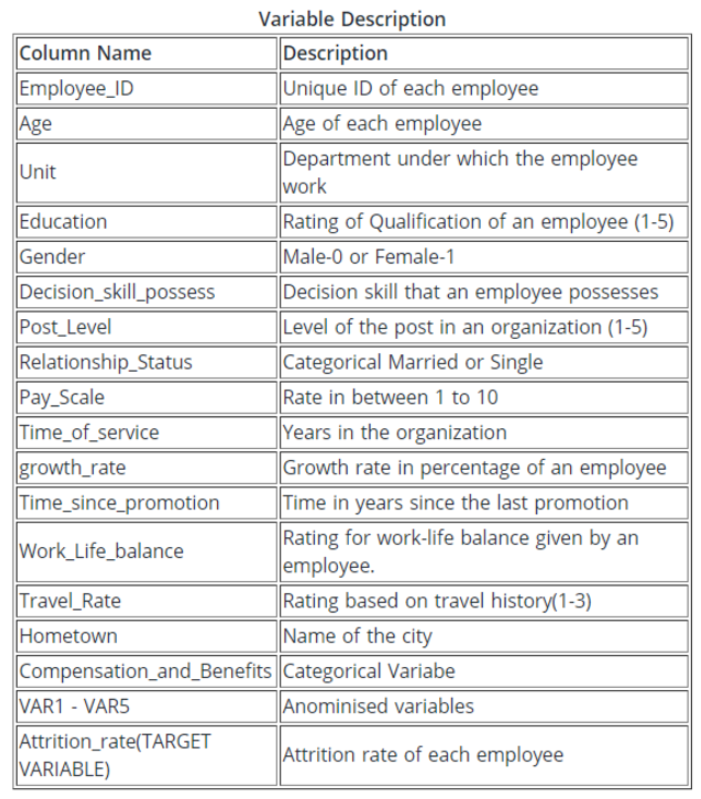

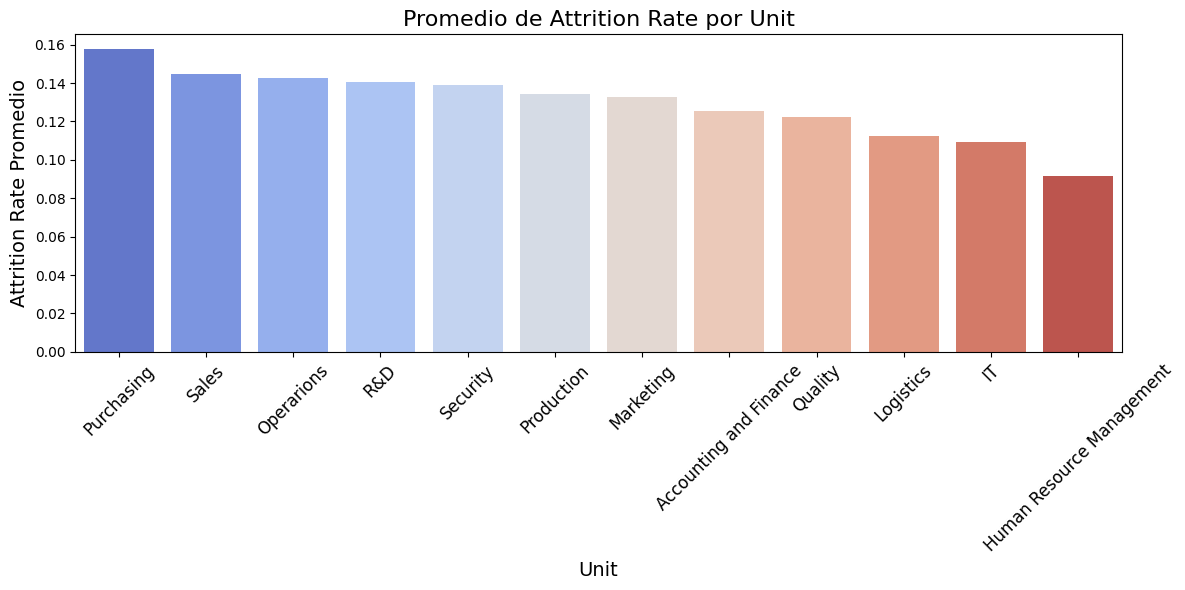

In [47]:
unit_attrition = df_total.groupby('Unit')['Attrition_rate'].mean().reset_index()

# Ordenamos las unidades por tasa de Attrition
unit_attrition = unit_attrition.sort_values(by='Attrition_rate', ascending=False)

# Creamos la gráfica de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unit_attrition, x='Unit', y='Attrition_rate', palette='coolwarm')

# Configuración de la gráfica
plt.title('Promedio de Attrition Rate por Unit', fontsize=16)
plt.xlabel('Unit', fontsize=14)
plt.ylabel('Attrition Rate Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

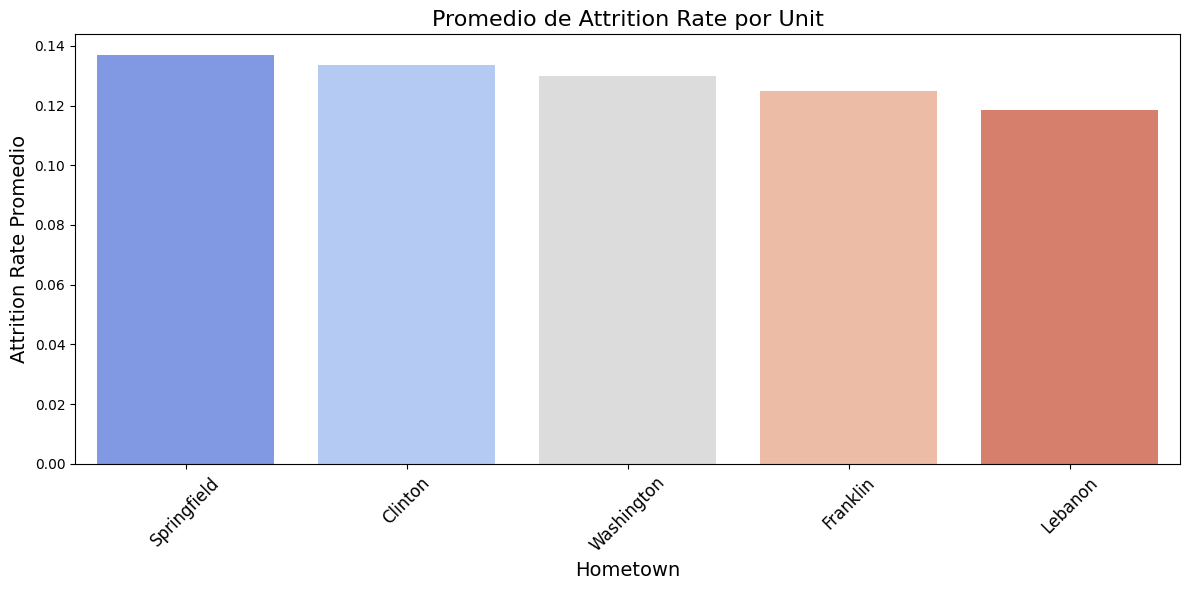

In [48]:
unit_attrition = df_total.groupby('Hometown')['Attrition_rate'].mean().reset_index()

# Ordenamos las unidades por tasa de Attrition
unit_attrition = unit_attrition.sort_values(by='Attrition_rate', ascending=False)

# Creamos la gráfica de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unit_attrition, x='Hometown', y='Attrition_rate', palette='coolwarm')

# Configuración de la gráfica
plt.title('Promedio de Attrition Rate por Unit', fontsize=16)
plt.xlabel('Hometown', fontsize=14)
plt.ylabel('Attrition Rate Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

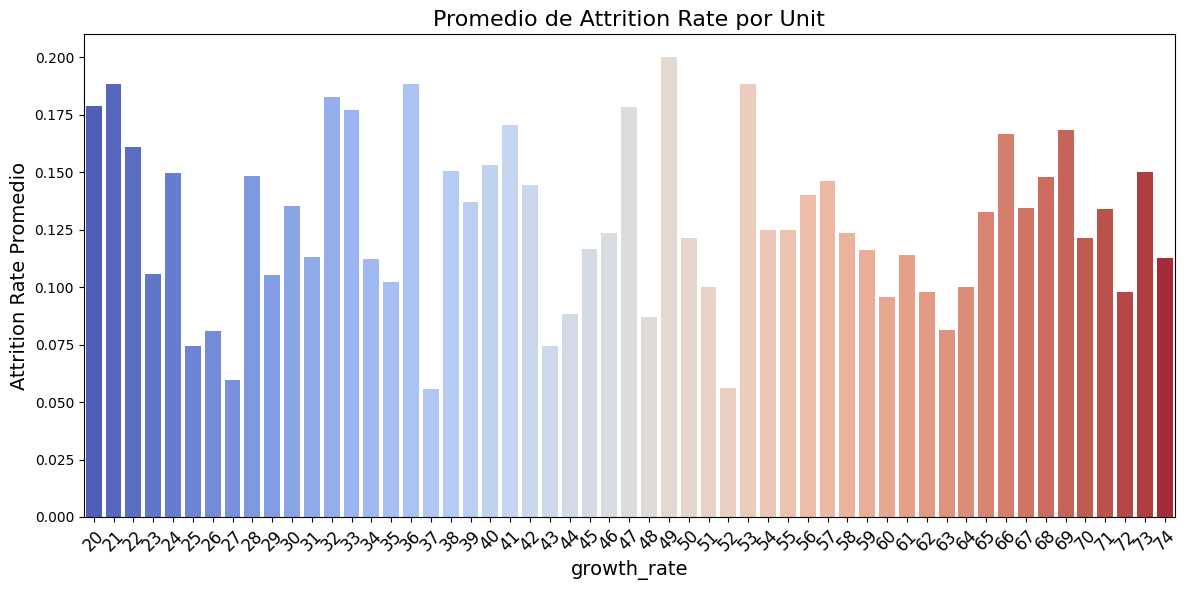

In [49]:
unit_attrition = train_data.groupby('growth_rate')['Attrition_rate'].mean().reset_index()

# Ordenamos las unidades por tasa de Attrition
unit_attrition = unit_attrition.sort_values(by='Attrition_rate', ascending=False)

# Creamos la gráfica de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unit_attrition, x='growth_rate', y='Attrition_rate', palette='coolwarm')

# Configuración de la gráfica
plt.title('Promedio de Attrition Rate por Unit', fontsize=16)
plt.xlabel('growth_rate', fontsize=14)
plt.ylabel('Attrition Rate Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

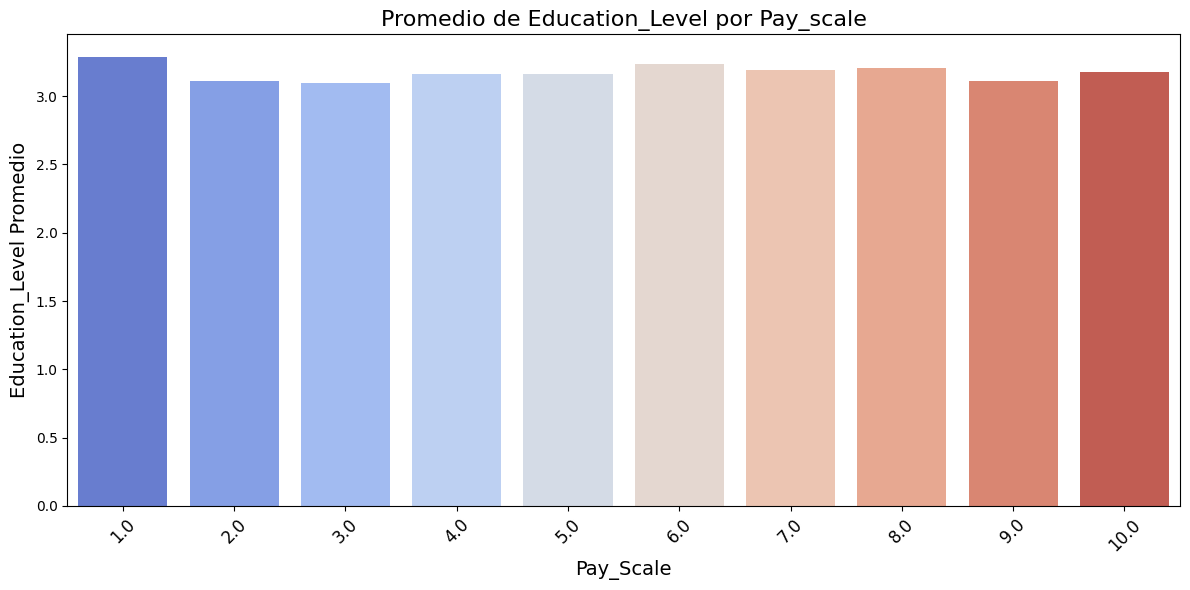

In [50]:
unit_attrition = train_data.groupby('Pay_Scale')['Education_Level'].mean().reset_index()

# Ordenamos las unidades por tasa de Attrition
unit_attrition = unit_attrition.sort_values(by='Education_Level', ascending=False)

# Creamos la gráfica de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unit_attrition, x='Pay_Scale', y='Education_Level', palette='coolwarm')

# Configuración de la gráfica
plt.title('Promedio de Education_Level por Pay_scale', fontsize=16)
plt.xlabel('Pay_Scale', fontsize=14)
plt.ylabel('Education_Level Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

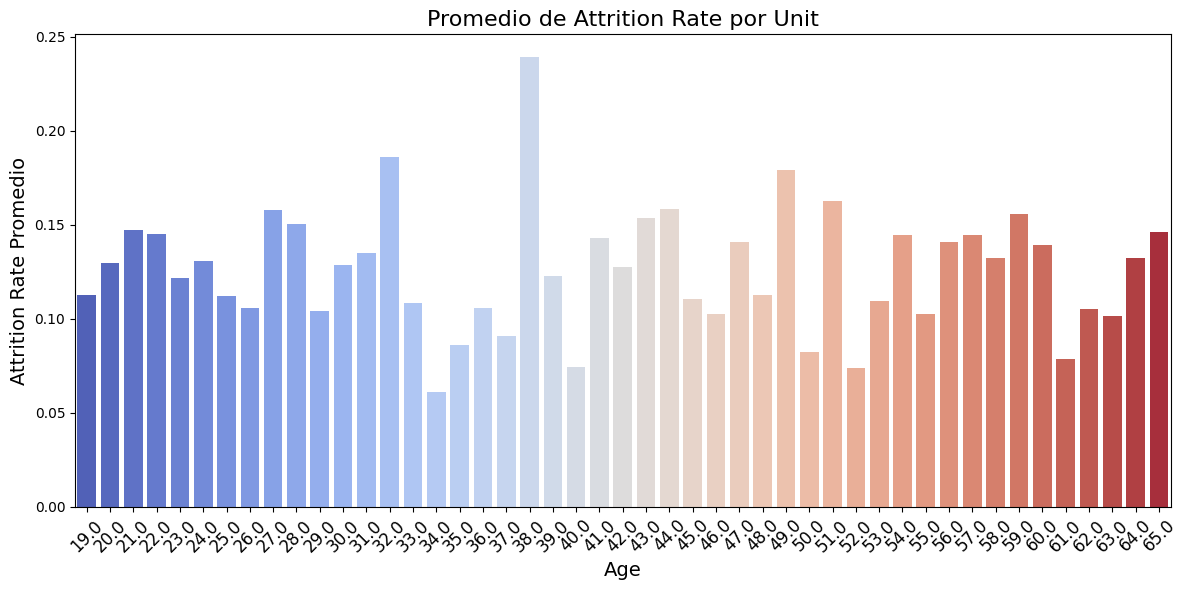

In [51]:
unit_attrition = df_total.groupby('Age')['Attrition_rate'].mean().reset_index()

# Ordenamos las unidades por tasa de Attrition
unit_attrition = unit_attrition.sort_values(by='Attrition_rate', ascending=False)

# Creamos la gráfica de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unit_attrition, x='Age', y='Attrition_rate', palette='coolwarm')

# Configuración de la gráfica
plt.title('Promedio de Attrition Rate por Unit', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Attrition Rate Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [52]:
# Extract and store the unique values
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

unique_values

{'Gender': array(['F', 'M'], dtype=object),
 'Age': array([42., 24., 58., 31., 54., 21., 45., 65., 19., 63., 23., 40., 33.,
        22., 25., 47., 34., 55., 46., 28., 30., 43., 27., 57., 41., 37.,
        60., 56., 44., 49., 51., 36., 26., 29., 50., 20., 59., 53., 35.,
        32., 62., 61., 64., 38., 52., 48., 39.]),
 'Education_Level': array([4, 3, 1, 5, 2], dtype=int64),
 'Relationship_Status': array(['Married', 'Single'], dtype=object),
 'Hometown': array(['Franklin', 'Springfield', 'Clinton', 'Lebanon', 'Washington'],
       dtype=object),
 'Unit': array(['IT', 'Logistics', 'Quality', 'Purchasing', 'Operarions', 'Sales',
        'Human Resource Management', 'Accounting and Finance', 'R&D',
        'Marketing', 'Production', 'Security'], dtype=object),
 'Decision_skill_possess': array(['Conceptual', 'Analytical', 'Directive', 'Behavioral'],
       dtype=object),
 'Time_of_service': array([ 4.,  5., 27., 19.,  2., 21., 31.,  0., 35., 12.,  9.,  3.,  6.,
        30., 33., 10., 26.,  

In [53]:
#Save unique values and model together in a single pickle file
file_path = 'model_and_key_components.pkl'

# Create a dictionary to store the components
saved_components = {
    'model': catboost_model,
    'unique_values': unique_values
}

# Save all components in a single pickle file
with open(file_path, 'wb') as file:
    pickle.dump(saved_components, file)

In [54]:
#pip install catboost shap

In [55]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

non_numeric_columns

['Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [56]:
df.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
dtype: object

In [57]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split

# # Datos de ejemplo
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# cat_features=['Gender','Relationship_Status', 'Hometown',
#        'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']


# # Crear y entrenar el modelo
# model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=cat_features)  # Sincat_features logs para claridad
# model.fit(X_train, y_train)

In [58]:
import shap

# Crear el objeto de SHAP explainer
explainer = shap.TreeExplainer(model)

In [59]:
# Obtener los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_eval)

Diferencias clave entre el feature importance del modelo y de SHAP:
Cálculo:

CatBoost calcula la importancia de las características según su contribución a la reducción del error global durante el entrenamiento, sin tener en cuenta sus efectos en las predicciones individuales.
SHAP calcula el impacto de cada característica en las predicciones específicas de cada instancia de datos, basándose en un análisis cooperativo de características y sus interacciones.
Impacto en el orden de las características:

Debido a las diferencias en los métodos, el orden de las características importantes puede variar. Las características que tienen una gran contribución a la reducción del error global en el modelo CatBoost podrían no ser las mismas que aquellas que tienen un gran impacto en las predicciones individuales (según SHAP). Además, SHAP también considera las interacciones entre características, lo que puede alterar el orden de las importancias.
Propósito de uso:

feature_importances_ de CatBoost es útil cuando se busca una visión rápida de las características más relevantes para el modelo global. Es un indicador de qué tan importante es cada variable para el ajuste del modelo.
SHAP proporciona una explicación más profunda y detallada, ya que se centra en cómo cada característica contribuye a las predicciones específicas y cómo sus interacciones afectan el modelo.

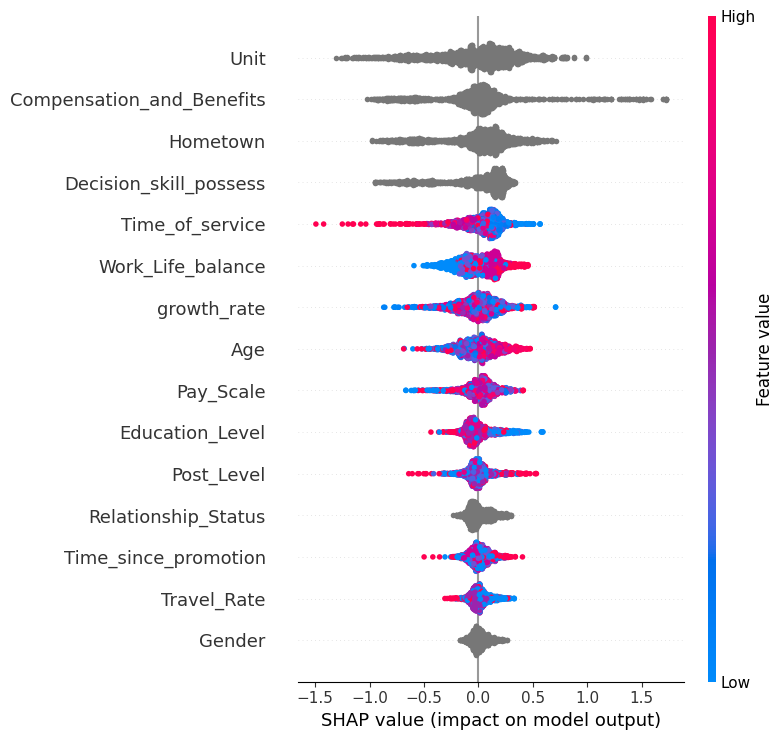

In [60]:
shap.summary_plot(shap_values, X_eval)

Los valores numéricos más representativos resultan ser Time of service, nos informa de que las personas que más tiempo llevan en la empresa son menos probables de abandonar la empresa.
El growth_rate, el valor numérico más importante para entrenar el modelo, nos indica que los valores más altos de crecimiento no están diferenciados ni son especialmente característicos para la determinación de la probabilidad de abandono.
En cuanto a la edad, las personas más senior resultan ser las más inclinadas a abandonar la empresa que las novicias, pudiendo entender por ello que tienen mayores habilidades que suponen una mayor facilidad en la búsqueda de empleos nuevos.
El departamento de compras resulta ser el más probable que abandone el puesto, mientras que el departamento de Recursos Humanos es el que disfruta de una menor probabilidad.
Por otro lado, Springfield es la ciudad natal de las personas más probables de abandonar su puesto mientras que las de Lebanon son las que menor probabilidad tienen.
Encontramos una relación inversa muy interesante en cuanto a la media, los peor pagados y con mayor nivel educativo suelen abandonar menos esta empresa, mientras que los que son mejor pagados aunque con nivel bajo de educación resultan ser más propensos a cambiar de empresa, aunque no se trata de una relación directa, se trata de los valores de media mostrados en la gráfica de importancia en predicción.

Unit: Quality


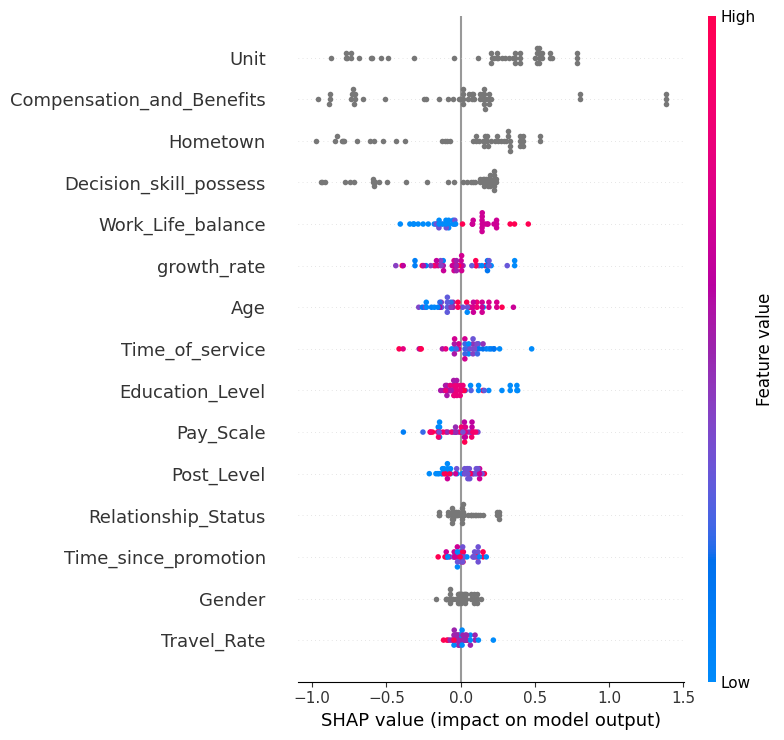

Unit: Logistics


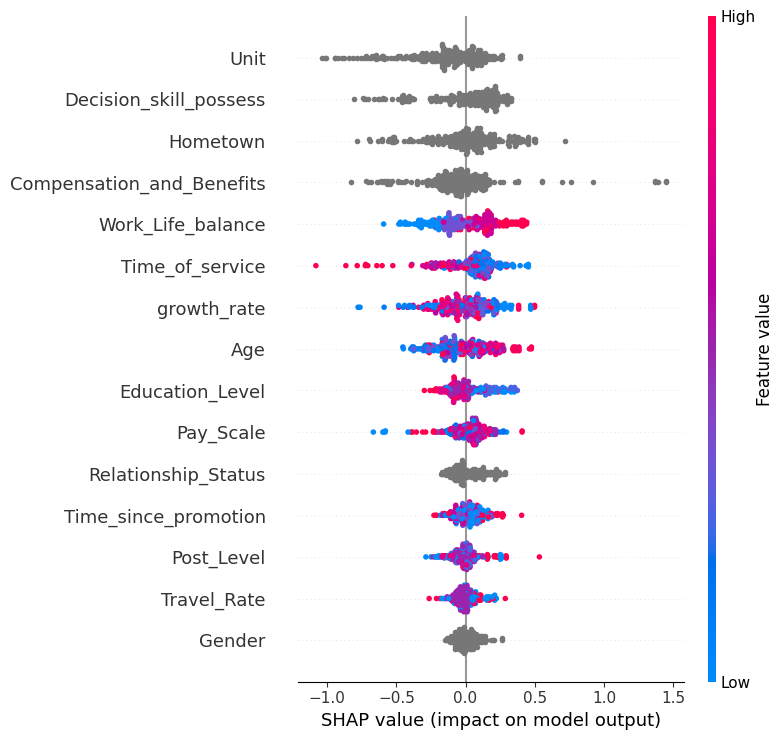

Unit: Purchasing


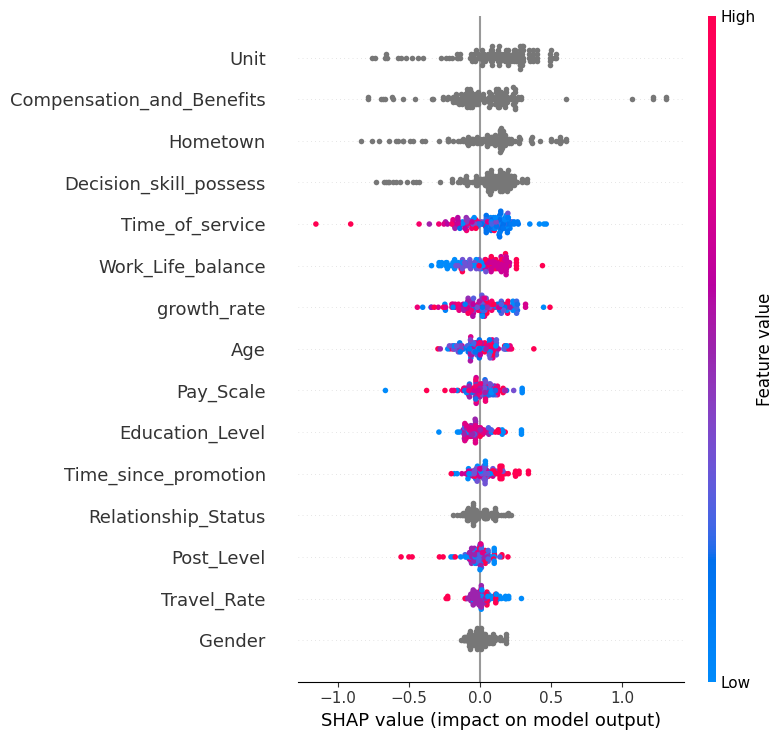

Unit: IT


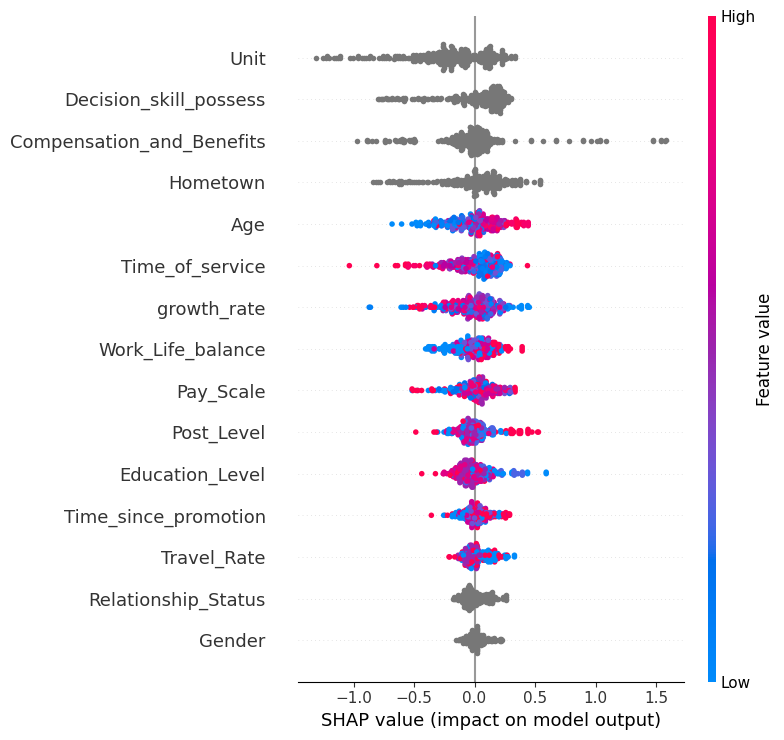

Unit: Human Resource Management


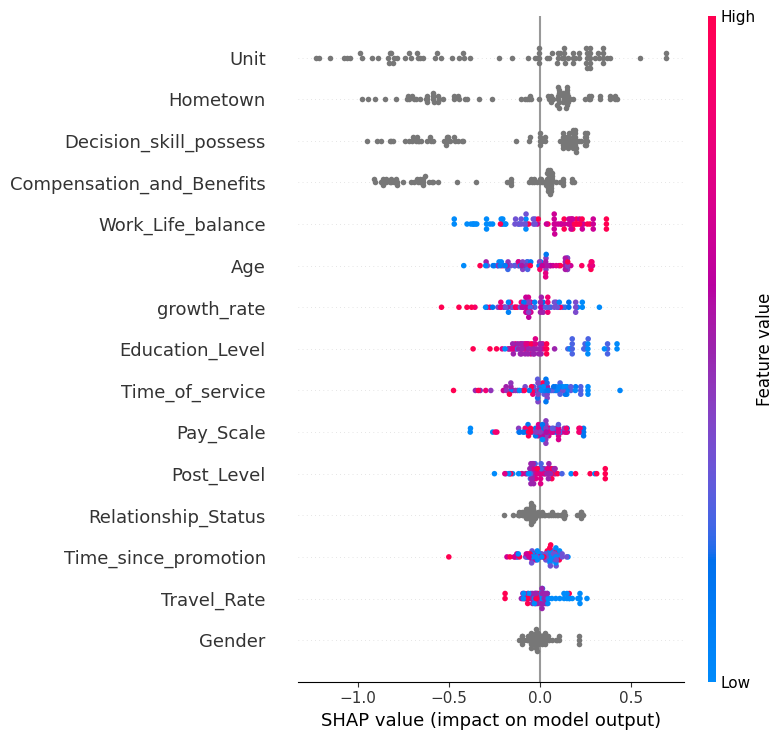

Unit: Marketing


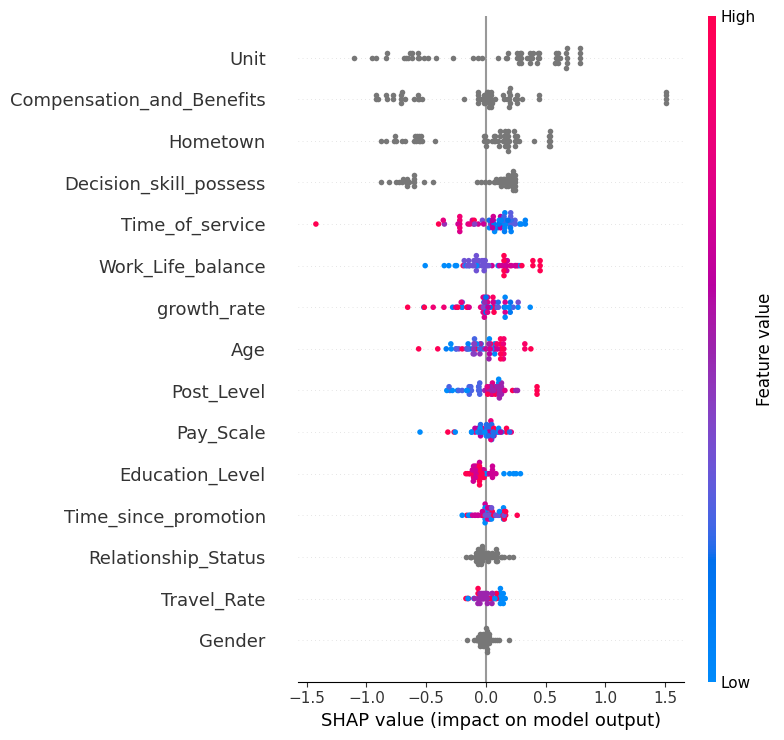

Unit: Operarions


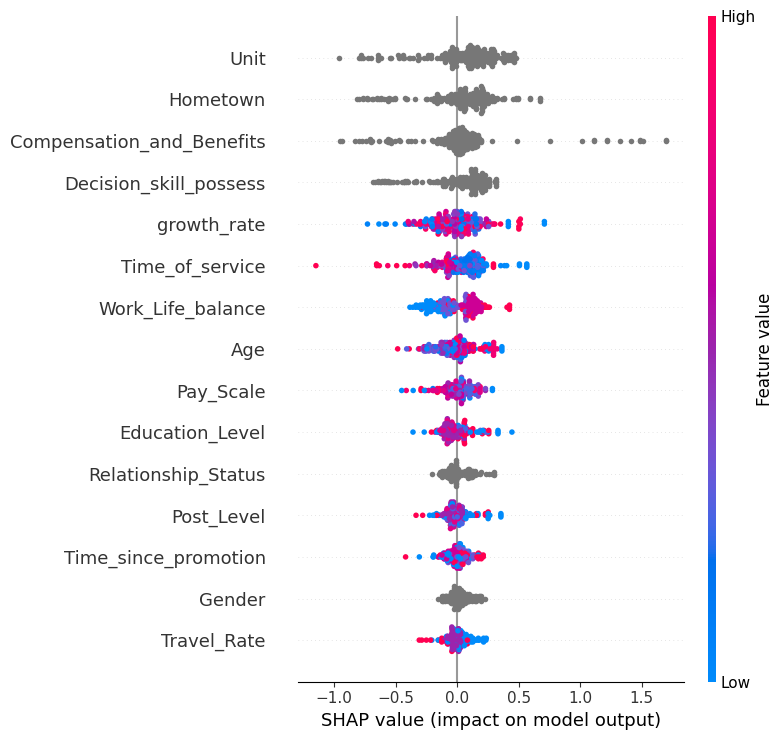

Unit: Accounting and Finance


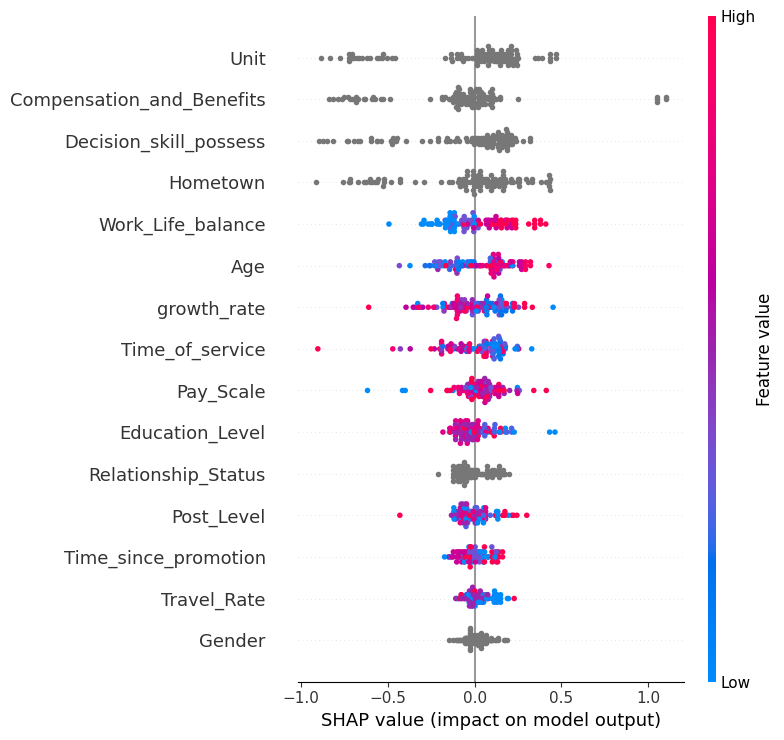

Unit: Production


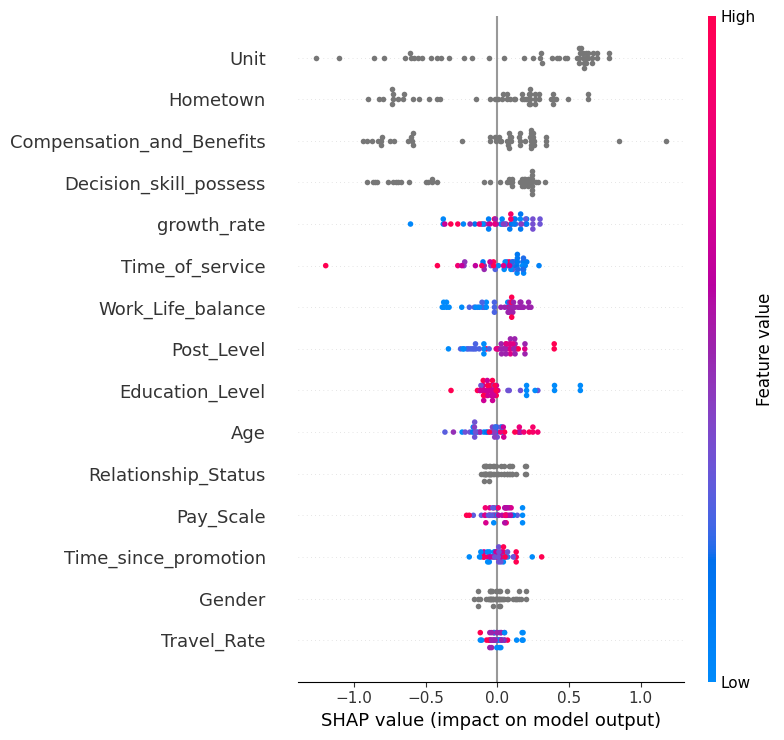

Unit: Sales


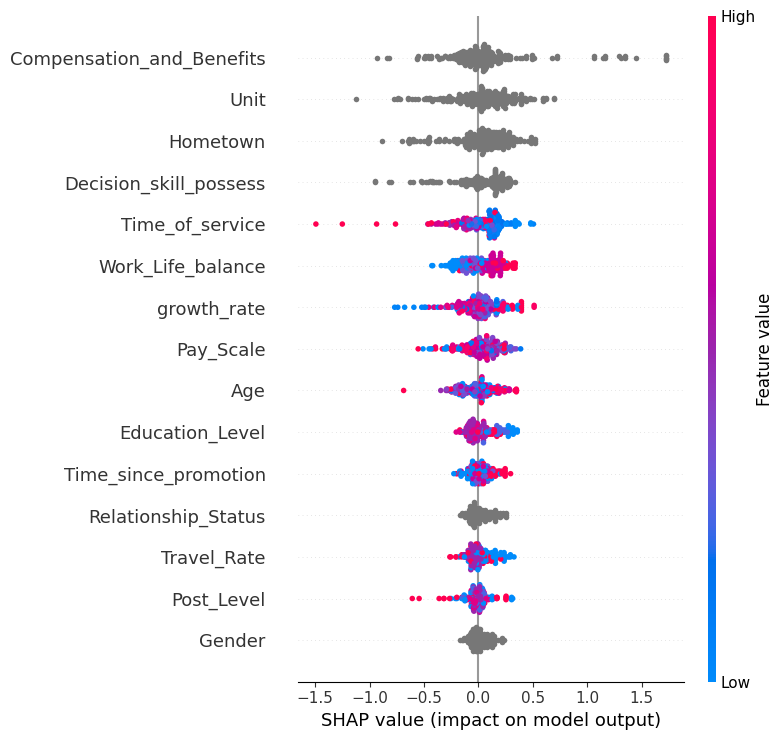

Unit: R&D


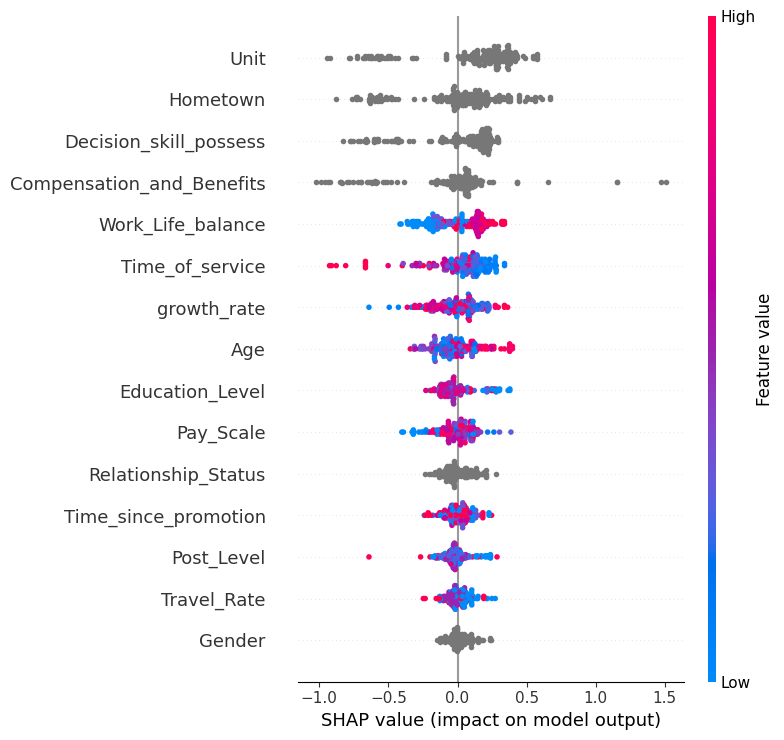

Unit: Security


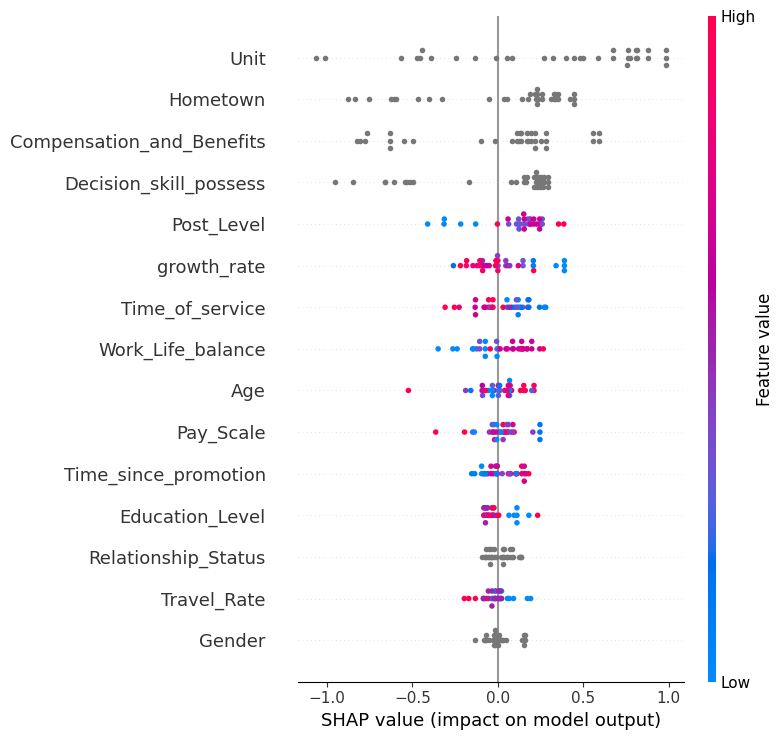

<Figure size 640x480 with 0 Axes>

In [61]:
import shap
import matplotlib.pyplot as plt

# Asegúrate de que X_eval tiene una columna "Unit" que identifica cada unidad
units = X_eval['Unit'].unique()  # Obtener todas las unidades únicas

for unit in units:
    print("Unit:", unit)
    # Filtrar el conjunto de datos para la unidad actual
    unit_data = X_eval[X_eval['Unit'] == unit]

    # Calcular los valores SHAP para esta unidad
    shap_values_unit = explainer(unit_data)
    
    # Crear el gráfico de resumen para esta unidad
    shap.summary_plot(shap_values_unit, unit_data)
    
    # Para guardar el gráfico como imagen (opcional)
    plt.savefig(f'shap_summary_plot_unit_{unit}.png')
    plt.clf()  # Limpiar el gráfico para la siguiente unidad

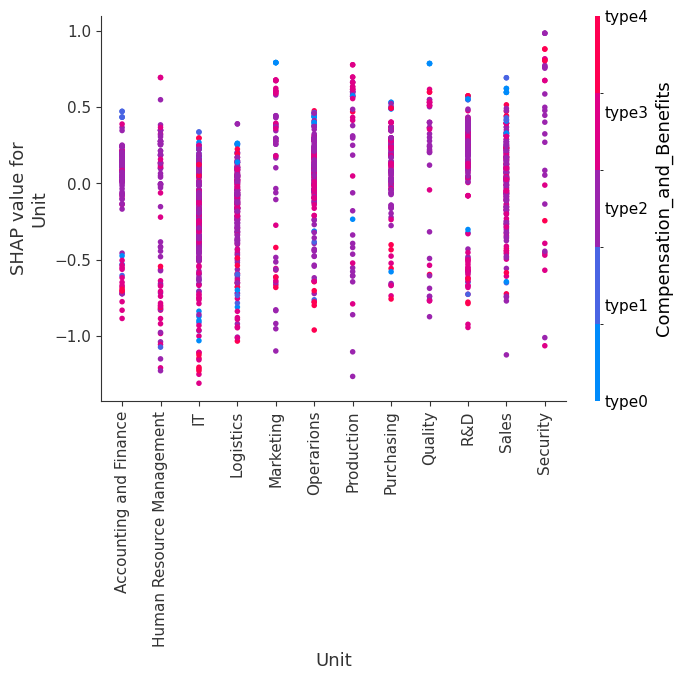

In [62]:
shap.dependence_plot("Unit", shap_values, X_eval)

In [63]:
import shap
import random

random_value = random.randint(0, 1800)

shap.initjs()  # Inicializa el entorno de visualización interactiva
shap.force_plot(explainer.expected_value, shap_values[random_value], X_eval.iloc[random_value])

In [64]:
shap.initjs()  # Inicializa el entorno de visualización interactiva
shap.force_plot(explainer.expected_value, shap_values[0], X_eval.iloc[0])

In [65]:
print(X_eval.iloc[0])

Gender                                F
Age                                31.0
Education_Level                       5
Relationship_Status             Married
Hometown                     Washington
Unit                            Quality
Decision_skill_possess       Analytical
Time_of_service                     5.0
Time_since_promotion                  2
growth_rate                          24
Travel_Rate                           2
Post_Level                            4
Pay_Scale                           6.0
Compensation_and_Benefits         type3
Work_Life_balance                   3.0
Name: 6776, dtype: object


In [66]:
shap.initjs()  # Inicializa el entorno de visualización interactiva
shap.force_plot(explainer.expected_value, shap_values[3], X_eval.iloc[3])

In [67]:
print(X_eval.iloc[3])
# Puede aportar más valor conocer si el trabajo es en remoto o no y distancia desde el trabajo a casa

Gender                                M
Age                                47.0
Education_Level                       3
Relationship_Status             Married
Hometown                     Washington
Unit                                 IT
Decision_skill_possess       Conceptual
Time_of_service                    22.0
Time_since_promotion                  3
growth_rate                          64
Travel_Rate                           1
Post_Level                            3
Pay_Scale                           2.0
Compensation_and_Benefits         type2
Work_Life_balance                   4.0
Name: 1447, dtype: object


In [68]:
realData = pd.read_csv('AR Quest - Respuestas de formulario 1.csv')
df_realData = realData


In [69]:
input_data=df_realData.drop(columns=['Marca temporal', 'Employee_ID'])
input_data.head()
input_data.dtypes
#input_data = input_data.astype({col: 'string' for col in input_data.select_dtypes(include=['object']).columns})

input_data.dtypes

Gender                       object
Age                           int64
Education_Level               int64
Relationship_Status          object
Hometown                     object
Unit                         object
Decision_skill_possess       object
Time_of_service               int64
Time_since_promotion          int64
growth_rate                   int64
Travel_Rate                   int64
Post_Level                    int64
Pay_Scale                     int64
Compensation_and_Benefits    object
Work_Life_balance             int64
dtype: object

In [70]:
# Paso 3: Realizar las predicciones
predictions = catboost_model.predict(input_data)

# Paso 4: Mostrar las predicciones
print("Predicciones:", predictions)

Predicciones: [1]


In [71]:
# Paso 3: Realizar las predicciones
predictions = catboost_model.predict(X_eval.iloc[3])

# Paso 4: Mostrar las predicciones
print("Predicciones:", predictions)

Predicciones: 0


In [72]:
catboost_model.save_model("cat_boost_model_Attrition_Rate_2024-12-10.cbm")

Añadir medio año sin acciones tomadas por el equipo de recursos humanos al dataset.

In [73]:
predictions = pd.DataFrame()
Dataset_Futuro = X_eval.copy()
original = X_eval.copy()
# Calcular el número total de filas
total_rows = len(original)

for i in range(25):
    
    Dataset_Futuro['Age'] = X_eval['Age'] + (i*(1/12))
    Dataset_Futuro['Time_of_service'] = X_eval['Time_of_service'] + (i*(1/12))
    Dataset_Futuro['Time_since_promotion'] = X_eval['Time_since_promotion'] + (i*(1/12))
    Dataset_Futuro['growth_rate'] = Dataset_Futuro['growth_rate'].apply(lambda x: 0 if x - (i * (100 / 12)) <= 0 else x - (i * (100 / 12))) # Reducción de la tasa de crecimiento de 8,3% mensual
    #print(Dataset_Futuro['Age'].iloc[0])
    
    column_name = f"Pred_month_{i}"  # Nombrar la nueva columna dinámicamente
    predictions[column_name] = catboost_model.predict(Dataset_Futuro)
    #print(predictions[column_name].iloc[0])  

original.reset_index(drop=True, inplace=True)  # Esto restablece el índice a una secuencia numérica
predictions.reset_index(drop=True, inplace=True)  # Esto restablece el índice a una secuencia numérica
original=original.join(predictions)

#print(original)
original.to_csv("resultados_futuro.csv", index=False)
#predictions

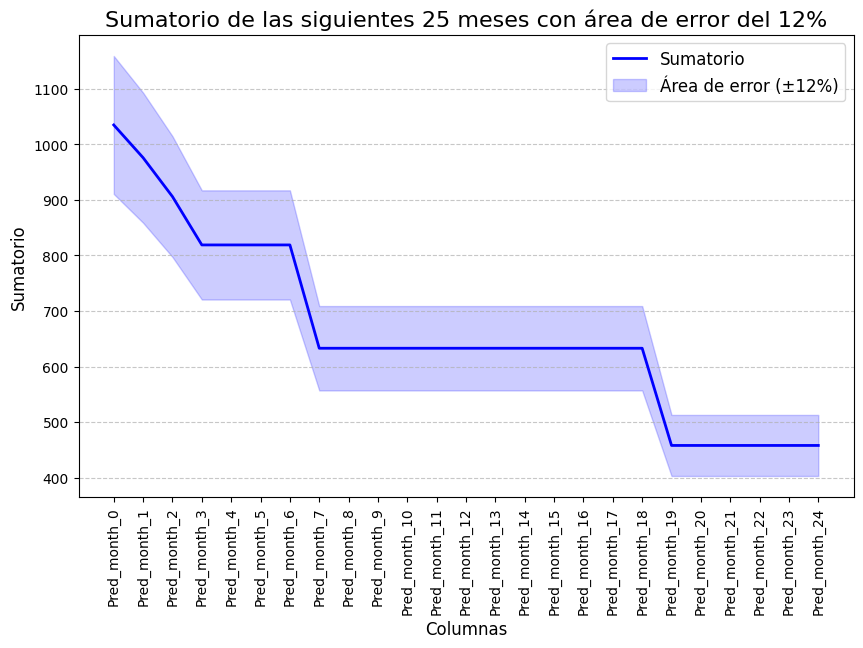

In [74]:
# Seleccionar las últimas 25 columnas
last_25_columns = original.iloc[:, -25:]

# Calcular el sumatorio de las últimas 25 columnas
column_sums = last_25_columns.sum()


# Calcular el error del 12% (12% del valor real)
error = column_sums.values * 0.12

# Crear un gráfico de líneas con área de error
plt.figure(figsize=(10, 6))

# Graficar la línea principal (tendencia)
plt.plot(column_sums.index, column_sums.values, label='Sumatorio', color='blue', linewidth=2)

# Dibujar la sombra del error sin afectar la línea principal
plt.fill_between(
    column_sums.index,
    column_sums.values - error,
    column_sums.values + error,
    color='blue',
    alpha=0.2,
    label='Área de error (±12%)'
)

# Personalizar el gráfico
plt.title('Sumatorio de las siguientes 25 meses con área de error del 12%', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Sumatorio', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

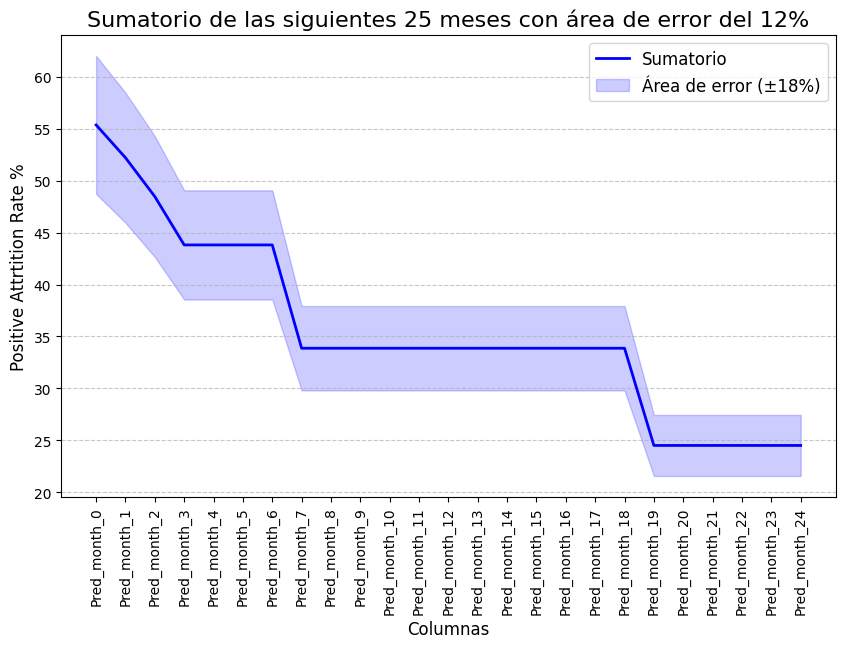

In [75]:
# Seleccionar las últimas 25 columnas
last_25_columns = original.iloc[:, -25:]

# Calcular el sumatorio de las últimas 25 columnas
column_sums = last_25_columns.sum()

# Calcular el porcentaje
attrition_count = column_sums
attrition_count = (attrition_count / total_rows) * 100

# Calcular el error del 12% (12% del valor real)
error = attrition_count.values * 0.12

# Crear un gráfico de líneas con área de error
plt.figure(figsize=(10, 6))

# Graficar la línea principal (tendencia)
plt.plot(attrition_count.index, attrition_count.values, label='Sumatorio', color='blue', linewidth=2)

# Dibujar la sombra del error sin afectar la línea principal
plt.fill_between(
    attrition_count.index,
    attrition_count.values - error,
    attrition_count.values + error,
    color='blue',
    alpha=0.2,
    label='Área de error (±18%)'
)

# Personalizar el gráfico
plt.title('Sumatorio de las siguientes 25 meses con área de error del 12%', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Positive Attrtition Rate %', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

In [76]:
X_eval

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance
6776,F,31.0,5,Married,Washington,Quality,Analytical,5.0,2,24,2,4,6.0,type3,3.0
3314,F,22.0,2,Single,Springfield,Logistics,Behavioral,3.0,2,72,1,5,5.0,type3,4.0
7866,M,27.0,3,Married,Washington,Purchasing,Conceptual,5.0,4,68,0,3,8.0,type3,4.0
1447,M,47.0,3,Married,Washington,IT,Conceptual,22.0,3,64,1,3,2.0,type2,4.0
6431,M,38.0,2,Single,Franklin,Human Resource Management,Conceptual,10.0,4,41,2,5,4.0,type2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,F,31.0,3,Married,Franklin,R&D,Behavioral,6.0,1,27,1,1,4.0,type0,2.0
9264,M,53.0,4,Single,Springfield,Accounting and Finance,Behavioral,26.0,4,31,1,1,5.0,type1,2.0
5561,M,63.0,3,Married,Springfield,Operarions,Directive,31.0,2,24,1,4,9.0,type3,4.0
8274,M,37.0,3,Single,Lebanon,R&D,Conceptual,11.0,1,59,0,3,5.0,type2,3.0


In [77]:
#pip install requests

In [78]:
# import requests
# from PIL import Image
# from io import BytesIO

# descripcion = 'Gato contento'
# # Función para generar imágenes con Craiyon (DALL·E Mini)
# def generar_imagen_craiyon(descripcion):
#     url = "https://api.craiyon.com/generate"  # URL de la API no oficial
#     payload = {
#         "prompt": descripcion,
#         "n": 1  # Generar una imagen
#     }

#     response = requests.post(url, json=payload)
    
#     if response.status_code == 200:
#         # Obtener la imagen desde la URL de la respuesta
#         imagen_url = response.json()[0]
        
#         # Descargar la imagen generada
#         imagen_response = requests.get(imagen_url)
#         img = Image.open(BytesIO(imagen_response.content))
        
#         # Mostrar la imagen
#         img.show()
        
#         return imagen_url  # Retorna la URL de la imagen generada
#     else:
#         print(f"Error: {response.status_code}")
#         return None

# imagen_url = generar_imagen_craiyon(descripcion)
# print(f"{imagen_url}")

# # Crear un ejemplo de DataFrame
# import pandas as pd

# data = {
#     'Nombre': ['Alice', 'Bob', 'Charlie'],
#     'Edad': [30, 25, 35],
#     'Genero': ['Femenino', 'Masculino', 'Masculino'],
#     'Profesión': ['Ingeniera', 'Abogado', 'Médico'],
# }

# df = pd.DataFrame(data)

# # Iterar sobre el DataFrame y generar imágenes
# for index, row in df.iterrows():
#     descripcion = f"{row['Nombre']}, de {row['Edad']} años, género {row['Genero']}, trabaja como {row['Profesión']}"
#     print(f"Generando imagen para {row['Nombre']}...")
#     imagen_url = generar_imagen_craiyon(descripcion)
#     if imagen_url:
#         print(f"Imagen de {row['Nombre']}: {imagen_url}")

Error: 403
None
Generando imagen para Alice...
Error: 403
Generando imagen para Bob...
Error: 403
Generando imagen para Charlie...
Error: 403
